In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
result = pd.read_csv('final_merged.csv')

In [1]:
def plot_anomalies(tickers):
    # Define the grid size based on the number of tickers
    rows, cols = 5, 4  # Adjust based on layout preferences (e.g., 5x4 for 20 slots, leaving 3 empty)
    fig, axs = plt.subplots(rows, cols, figsize=(20, 15))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i, tic in enumerate(tickers):
        # Get the data for the current ticker
        data = result[result['tic'] == tic]
        
        # Calculate the row and column indices for this subplot
        row, col = divmod(i, cols)
        
        # Plot the closing price
        axs[row, col].plot(data['date'], data['close'], label='Close Price', color='blue')
        
        # Mark anomaly points
        anomaly = data[data['anomaly'] == 1]
        axs[row, col].scatter(anomaly['date'], anomaly['close'], color='red', label='Anomaly')
        
        # Set the title for each subplot
        axs[row, col].set_title(f'{tic} Anomaly Detection')
        axs[row, col].set_xlabel('Date')
        axs[row, col].set_ylabel('Close Price')
        
    # Turn off any unused subplots if there are empty spaces
    for j in range(i + 1, rows * cols):
        fig.delaxes(axs.flatten()[j])

    plt.show()



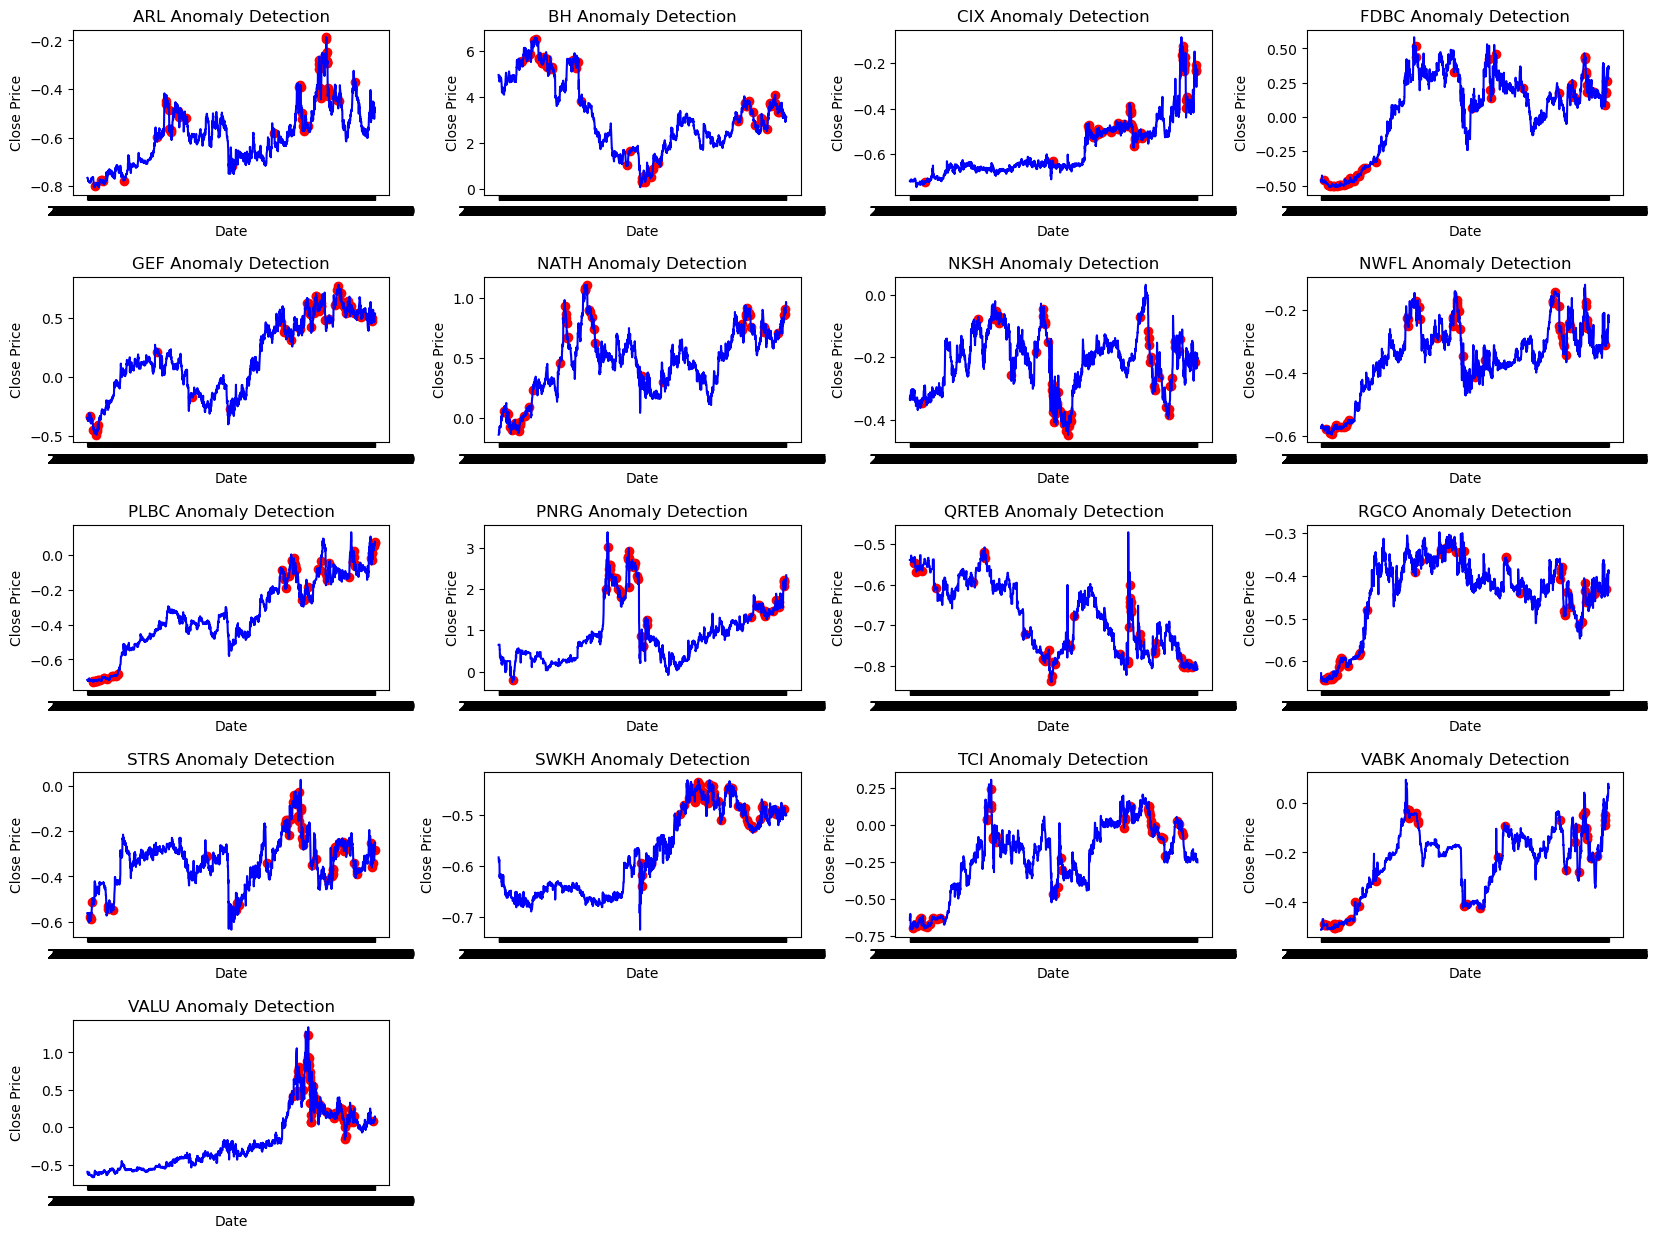

In [10]:
# List of 17 tickers
tickers = result.tic.unique().tolist()
plot_anomalies(tickers)